# Statistical Mechanics Python Template


### Table of Contents

1. [Install extra packages](#extra-packages)
2. [Imports](#imports)
3. [What is a dictionary?](#dictionary)
4. [Statistical mechanics](#statistical-mechanics)
5. [Plotting - Matplotlib](#plotting-matplotlib)
6. [Plotting - Plotly](#plotting-plotly)


Here are some helper functions for doing statistical mechanics calculations and plotting. Remember that once we know the energies and degeneracies (locations of all the microstates on our energy diagram), we do the steps

1. Set the ground state energy equal to 0.
2. Calculate the ways $w$ (relative or thermodynamic probability) for each state or level using the Boltzmann distribution.
3. Calculate the total ways $q$ (molecular partition function).
4. Calculate anything else we need from 2, 3, and the given information about the system. For example, $P_x = (\text{ways x}) / (\text{total ways}) = w_x/q$.

## Install extra packages <a id="extra-packages"></a>

The lines below install some helpful packages for more interactive plots (plotly), interactive sliders (ipywidgets), and easier to type dictionaries (munch). **You only need to run this cell once, then you can delete it.**

In [ ]:
!pip install plotly
!pip install ipywidgets
!pip install munch

### Imports <a id="imports"></a>

Let's import all the packages we might need:

In [ ]:
# Usual functions for math: np.exp, np.linspace, etc...
import numpy as np

# Spreadsheet-style tables (with data in rows and labeled columns) in Python
import pandas as pd

# Dictionaries that can use a.b rather than a['b'] (easier to type)
from munch import Munch

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px

# An easy way to make things interactive...
from ipywidgets import interact

# Physical constants
kB = 1.381e-23 # J/K
h = 6.626e-34 # Js
R = 8.314 # J/mol-K
R_kJ = R / 1000 # kJ/mol-K

# Units; add any other conversion factors you need 
amu = 1.6605e-27 # 1 amu = 1.6605e-27 kg

## What is a dictionary in Python? <a id="dictionary"></a>



Like a list, a dictionary is a mutable collection of many values. But unlike indexes for lists, indexes for dictionaries can use many different data types, not just integers. Indexes for dictionaries are called keys, and a key with its associated value is called a key-value pair. In code, a dictionary is typed with braces, `{}`.

More information? See [Automate the Boring Stuff: Ch 5](http://automatetheboringstuff.com/2e/chapter5/).

We can use dictionaries for things that we would use lookup tables for in Excel.

For example, consider trying to build a function to determine the molecular weight of a compound. You will need to have atoms (their symbols) and the molar mass of each. In Excel, we would need a table like

| Atom        | Mass        |
| ----------- | ----------- |
| H           |  1.008      |
| He          |  4.003      |
| C           | 12.011      |
| N           | 14.007      |
| O           | 15.999      |

In Python, we can make a dictionary, perhaps named `atom_masses` with that same information. The atoms are the *keys*, the masses are the *values*.

In [ ]:
atom_masses = {'H': 1.008, 'He': 4.003, 'C': 12.011, 'N': 14.007, 'O': 15.999}
atom_masses

To get a value from a dictionary, you use square brackets. So to get the molar mass of H, do

In [ ]:
atom_masses['H']

To calculate the molar mass of water, you can do

In [ ]:
atom_masses['H']*2 + atom_masses['O']

This can be a bit annoying to type. If we use the class Munch, we can get values using `.` instead; if we name it `am` for short, then `am.H` is the mass of hydrogen; this also makes it easy to use Jupyter notebook's tab-compete feature and just arrow up/down to grab the value:

<div>
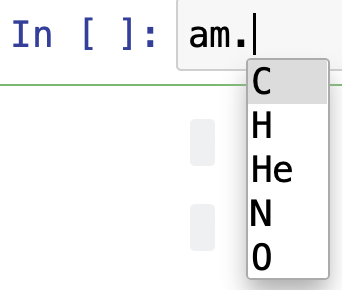
</div>

<!-- 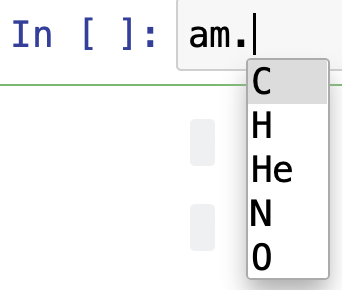 -->

In [ ]:
am = Munch(atom_masses)

In [ ]:
am.H*2 + am.O

## Statistical mechanics calculations <a id="statistical-mechanics"></a>

### Case 1: Just a few energy levels

There are lots of ways to do these calculations - here's one approach. Just define a function that takes the problem parameters as inputs, and then do all your calculations and output them all in a dictionary (or Munch for slightly easier access with `.`).

#### Example 

Consider the 4-unit polymer model from class show below. 


<div>
    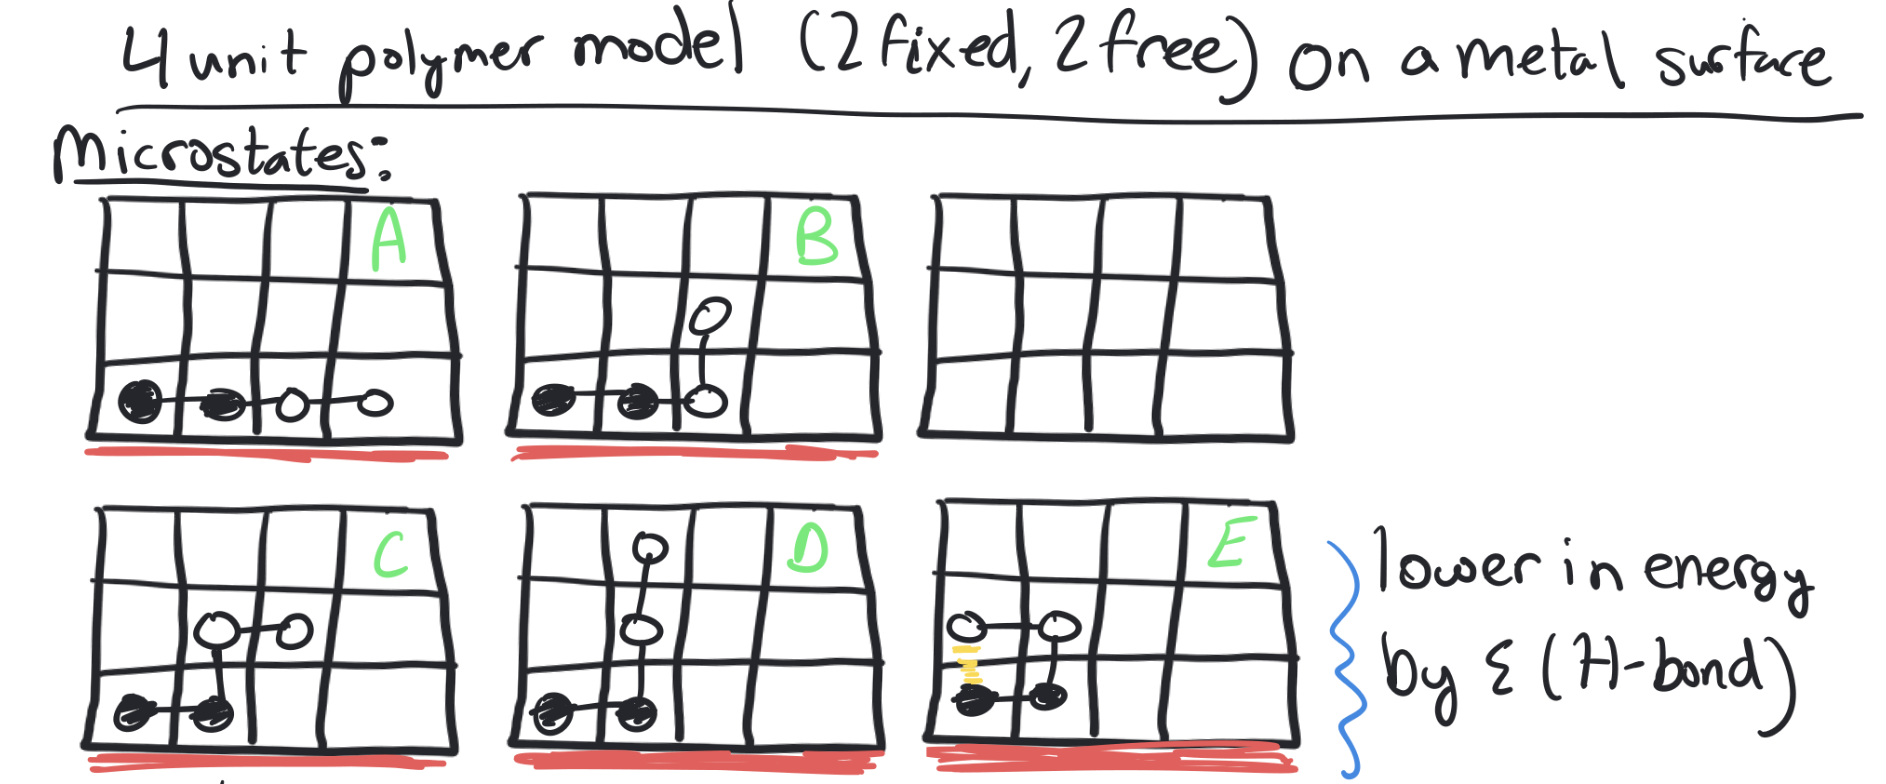
</div>



We had two energy levels that correspond to two macrostates:
- The collapsed (C) macrostate with 1 microstate (degeneracy $g_\text{collapsed} = 1$) at an energy of $0$
- The open (O) macrostate with 4 microstates (degeneracy $g_\text{open} = 4$) at an energy of $\varepsilon$


We want to calculate the probabilities, total ways $q$, and average energy per particle as a function of temperature $T$ (arbitrarily from 1 K to 2000 K).

**What are the inputs?** 
Trick: consider $k_B$ or $R$ an input so that you can change the units of your energy from J/particle to kJ/mol easily. Remember

$$\frac{\varepsilon}{k_B T} = \frac{E}{RT}$$

so you can use energy per particle $\epsilon$ and Boltzmann's constant $k_B$ or energy per mole of particles $E$ and the gas constant $R$ interchangably.

**Example function:** Now that we have our inputs, let's go through the steps in a function.

In [ ]:
def polymer4(E, T, R=R_kJ):
    """The 4 unit polymer model from class; by default,
    the model uses an energy E in kJ/mol. If you pass R=kB,
    you can use J/particle instead."""
    # Step 2: Define the ways



    # Step 3: Define the total ways q
    
    

   # Step 4: Define anything else we need - K, probabilities, average energy...


    # Outputs: Easy, we'll output everything!
    return Munch(locals()) # locals is a dictionary containing all variables defined in the function

#### Check

Use our pencil and paper results from class for $E = 5$ kJ/mol and $T=273$ K and $T=373$ K to check that your function is working properly.

In [ ]:
# Put appropriate calls to polymer4 function here...

Once we have our function, we can call our function using a numpy array of temperatures to quickly determine how all of our ways, probabilities, and equilibrium constants vary with temperature.

The variable `outs` should contain arrays listing all of our results versus temperature - to visualize this more easily, we'll make a pandas (abbreviated `pd`) DataFrame (like an Excel Table) from our results.

Try typing the text into a code cell below (no need to enter the many comments).

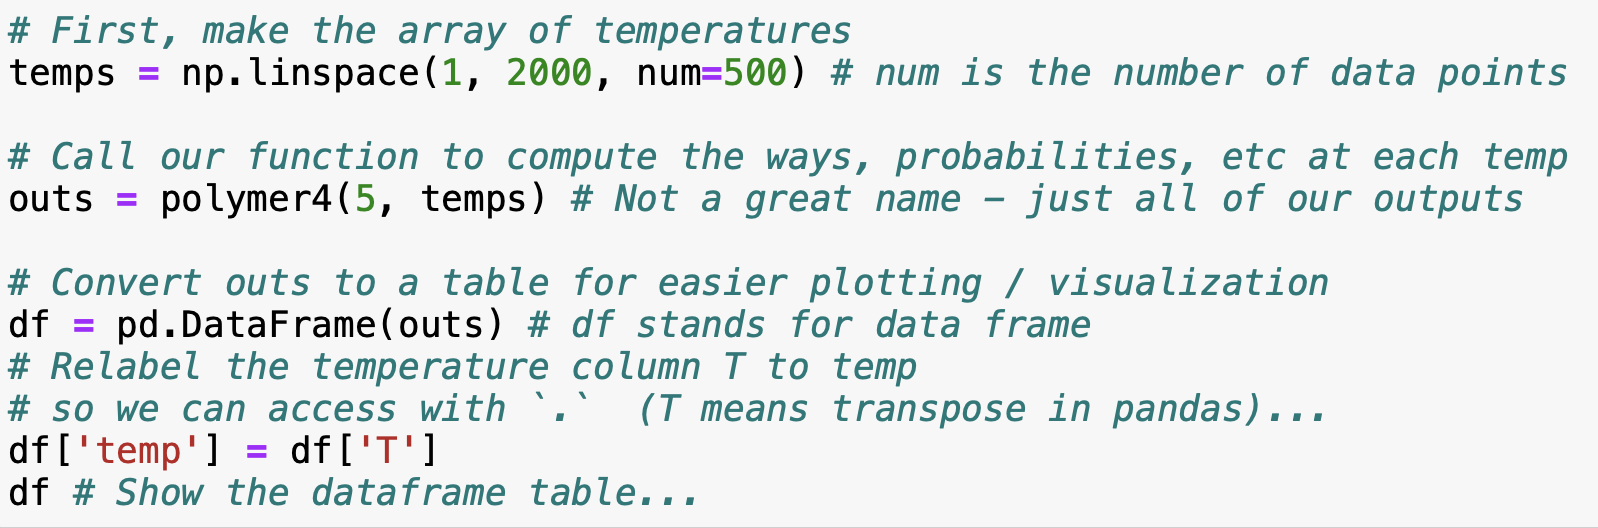

This contains all of our data - we can select a column using dictionary (`df['T']`) or dot `.` (`df.T`) syntax. Let's make a matplotlib plot below:

### Plotting - Matplotlib <a id="plotting-matplotlib"></a>

We can plot using matplotlib `plt.plot`, as you've used before. 

Modify the template below to plot the ways of each macrostate and total ways versus temperature.

In [ ]:
# In case you forgot, plt.plot works like this:
# plt.plot(x, y, label="Text for legend")
plt.plot(df.temp, df.R, label="Total ways")
# Add appropriate lines for wC and wO below...

plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend() # Show the legend

### Plotting - Plotly <a id="plotting-plotly"></a>

Plotly (abbreviated `px`) knows how to plot dataframes directly. Use `px.line` for a line plot and `px.scatter` for a scatter plot.

Modify the template below to plot the ways of each macrostate and total ways versus temperature.

In [ ]:
# If you give plotly a dataframe,
# just use the names of the columns to tell plotly what should be on each axis
# If you give a list, it will plot multiple things
px.line(df, x='T',
        # Try switching the y axis list to plot the right columns
        y=['R'],
        # Plotly labels are changed in a dictionary
        labels={'value': "Y axis label", # value is the default name given to the y-axis when multiple things are plotted
                'T': "Temperature (K)"
               }
       )

#### More plots

Try copying and pasting your code from above to make plots of

1. The probability of each macrostate versus temperature
2. The average energy versus temperature